# Emotion Recognition

# Import Things

In [51]:
import pandas as pd
import numpy as np
import neattext.functions as nfs
import plotly.express as px
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Flatten, Bidirectional
from keras.callbacks import EarlyStopping

# Read the data


In [2]:
df=pd.read_csv(r"Emotion_final.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


## Print first 10 Rows from our Dataset:

In [5]:
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


## Show the Shape of Data:

In [7]:
print("Number of Rows in this dataset:",df.shape[0])
print("Number of columns in this dataset",df.shape[1])

Number of Rows in this dataset: 21459
Number of columns in this dataset 2


## Describe the Data:

In [ ]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


## Visualize Emotions:

In [ ]:
emotion=pd.DataFrame(df["Emotion"].value_counts().sort_values(ascending=False).reset_index().rename(columns={"index":"Emotion","Emotion":"Total"}))


fig=px.pie(labels=emotion["Emotion"],values=emotion['Total'],names=emotion["Emotion"],width=500,height=500,title="Show the Emotions in %")
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Emotions', 
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.update_xaxes(showgrid=False)

fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",
                  xaxis_title=' ', yaxis_title=" ", height=400,width=600,plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=1.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
                  
                  


fig.show()

## Show the null value in this dataset

In [10]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [11]:
df["Emotion"].value_counts()

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

# Data Preprocessing

## Remove stopwords

In [60]:
df["clean_text"]=df["Text"].apply(nfs.remove_stopwords)
df["clean_text"]

0                                    didnt feel humiliated
1              feeling hopeless damned hopeful cares awake
2                im grabbing minute post feel greedy wrong
3                feeling nostalgic fireplace know property
4                                          feeling grouchy
                               ...                        
21454                           Melissa stared friend dism
21455    Successive state elections seen governing part...
21456                             Vincent irritated dismay
21457               Kendall-Hume turned face dismayed coup
21458                                   dismayed , surpris
Name: clean_text, Length: 21459, dtype: object

## Make Dummies

In [6]:
yy = pd.get_dummies(df["Emotion"])

In [7]:
class_labels = yy.columns.values
class_labels

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype=object)

## Extract two Features from the data:

In [8]:
X=df["clean_text"]
y=df["Emotion"]

In [16]:
X

0                                    didnt feel humiliated
1              feeling hopeless damned hopeful cares awake
2                im grabbing minute post feel greedy wrong
3                feeling nostalgic fireplace know property
4                                          feeling grouchy
                               ...                        
21454                           Melissa stared friend dism
21455    Successive state elections seen governing part...
21456                             Vincent irritated dismay
21457               Kendall-Hume turned face dismayed coup
21458                                   dismayed , surpris
Name: clean_text, Length: 21459, dtype: object

In [17]:
X[0]

'didnt feel humiliated'

## Tokenize the texts

In [9]:
MAX_WORDS = 2500
MAX_SEQUENCE_LENGTH = X.apply(len).max()
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(X.values)
word_index = tokenizer.word_index
X2 = tokenizer.texts_to_sequences(X.values)

## Add Padding

In [10]:
X2 = pad_sequences(X2, maxlen=MAX_SEQUENCE_LENGTH)

In [21]:
X2[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Split the data (90% train, 10% test) 

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X2,yy,stratify=yy, test_size = 0.10, random_state = 42)

# Model

In [58]:
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

## Model Visualization

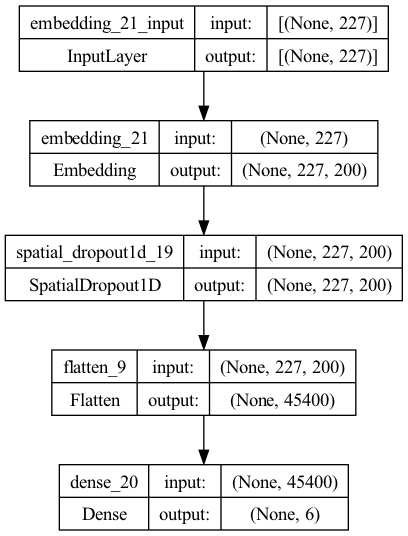

In [59]:
plot_model(model, show_shapes=True)

## Train the Model

In [46]:
epochs = 20
batch_size = 128
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[callback])

Epoch 1/20
136/136 [==============================] - 1s 8ms/step - loss: 1.5378 - accuracy: 0.4104 - val_loss: 1.3108 - val_accuracy: 0.5683
Epoch 2/20
136/136 [==============================] - 1s 8ms/step - loss: 0.9149 - accuracy: 0.7253 - val_loss: 0.6574 - val_accuracy: 0.8111
Epoch 3/20
136/136 [==============================] - 1s 8ms/step - loss: 0.4447 - accuracy: 0.8739 - val_loss: 0.4456 - val_accuracy: 0.8483
Epoch 4/20
136/136 [==============================] - 1s 8ms/step - loss: 0.2906 - accuracy: 0.9154 - val_loss: 0.3904 - val_accuracy: 0.8608
Epoch 5/20
136/136 [==============================] - 1s 7ms/step - loss: 0.2232 - accuracy: 0.9319 - val_loss: 0.3743 - val_accuracy: 0.8634
Epoch 6/20
136/136 [==============================] - 1s 7ms/step - loss: 0.1832 - accuracy: 0.9448 - val_loss: 0.3738 - val_accuracy: 0.8634
Epoch 7/20
136/136 [==============================] - 1s 7ms/step - loss: 0.1554 - accuracy: 0.9551 - val_loss: 0.3767 - val_accuracy: 0.8654
Epoch 

## Obtain Predictions

In [24]:
# Obtain predictions from the model
y_pred = model.predict(X_test)

# # Convert one-hot encoded predictions to class labels
# y_pred_labels = np.argmax(y_pred, axis=1)

# # Convert one-hot encoded predictions to probabilities
# y_pred_probs = y_pred

68/68 [==============================] - 4s 57ms/step


In [ ]:
y_pred[0]

array([5.9508446e-05, 7.8966168e-06, 9.9958974e-01, 1.1106504e-04,
       2.3039430e-04, 1.4845472e-06], dtype=float32)

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
y_pred_labels

array([2, 4, 1, ..., 2, 1, 4])

In [ ]:
class_labels
actual_classes = [class_labels[label] for label in y_pred_labels]

In [ ]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
text_sequences = tokenizer.sequences_to_texts(X_test)


In [ ]:
text_sequences

['im feeling jolly warm inside feel',
 'words letters feel like took college brain damaged',
 'love actually actually feel intimidated running outside',
 'ive suffering innocent children hands violent feel helpless trying things better',
 'feel heartless saying',
 'im feeling naughty like add little',
 'want feel angry right feel way',
 'refuse stay silent instead response sorry interested actually way feel shitty',
 'feel pretty weird considering friends colleagues new going reality',
 'wonder feeling complacent result',
 'feel like im hated',
 'feel horrible making worried',
 'suggest listen feel like blessed',
 'day head feeling little melancholy depressed couldnt bring water',
 'hear cool times day makes feel cool',
 'feeling brave like walk beach day',
 'ive feeling depressed lately things understand',
 'cant feel complacent',
 'ive change feeling productive lately lets goes shall',
 'intense excitement given way feeling stomach unable eat',
 'mother pleased local town park child'

In [ ]:
data = np.array(list(zip(text_sequences, actual_classes)))

# Convert the array to a DataFrame
df = pd.DataFrame(data, columns=['column1', 'column2'])

# column1 = text_sequences.reshape(-1, 1)
# column2 = actual_classes.reshape(-1, 1)

# data = np.concatenate([column1, column2], axis=1)
# df = pd.DataFrame(data, columns=['Column1', 'Column2'])

# Evaluate the Model

In [47]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

68/68 [==============================] - 0s 796us/step - loss: 0.3581 - accuracy: 0.8644
Test set
  Loss: 0.358
  Accuracy: 0.864


# Adjusting the Model

In [61]:
EMBEDDING_DIM = 200
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## Model Visualization

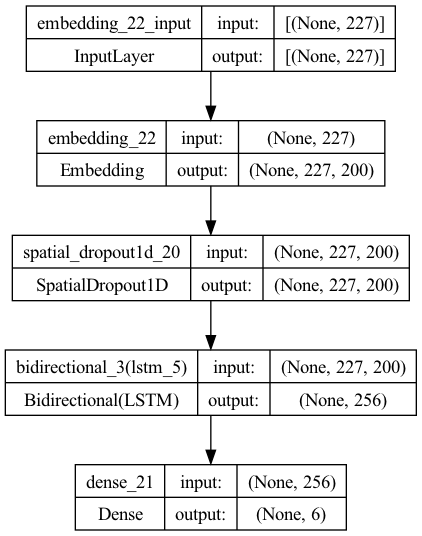

In [62]:
plot_model(model, show_shapes=True)

## Train the adjusted Model

In [56]:
epochs = 10
batch_size = 256
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=[callback])

Epoch 1/10
68/68 [==============================] - 157s 2s/step - loss: 0.0936 - accuracy: 0.9657 - val_loss: 0.3283 - val_accuracy: 0.8866
Epoch 2/10
68/68 [==============================] - 155s 2s/step - loss: 0.0846 - accuracy: 0.9677 - val_loss: 0.3243 - val_accuracy: 0.8960
Epoch 3/10
68/68 [==============================] - 153s 2s/step - loss: 0.0742 - accuracy: 0.9727 - val_loss: 0.3415 - val_accuracy: 0.8954
Epoch 4/10
68/68 [==============================] - 151s 2s/step - loss: 0.0723 - accuracy: 0.9740 - val_loss: 0.3680 - val_accuracy: 0.8934
Epoch 5/10
68/68 [==============================] - 151s 2s/step - loss: 0.0654 - accuracy: 0.9757 - val_loss: 0.3715 - val_accuracy: 0.8980
Epoch 6/10
68/68 [==============================] - 152s 2s/step - loss: 0.0599 - accuracy: 0.9788 - val_loss: 0.3765 - val_accuracy: 0.8980


# Evaluate the adjusted Model

In [57]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

68/68 [==============================] - 8s 118ms/step - loss: 0.3047 - accuracy: 0.8998
Test set
  Loss: 0.305
  Accuracy: 0.900
